### PROBLEM STATEMENT: We will construct a linear model that explains the relationship a car's mileage (mpg) has with its other attributes

## Import Libraries

### Step 1:Import the libraries

In [10]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
  

In [ ]:
### Step 2:Load the file

## Load and review data

In [11]:
car_df = pd.read_csv("auto-mpg.csv")  


In [12]:
car_df.shape

(398, 9)

In [13]:
car_df.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
80,22.0,4,122.0,86,2395,16.0,72,1,ford pinto (sw)
51,30.0,4,79.0,70,2074,19.5,71,2,peugeot 304
209,19.0,4,120.0,88,3270,21.9,76,2,peugeot 504
178,23.0,4,120.0,88,2957,17.0,75,2,peugeot 504
318,29.8,4,134.0,90,2711,15.5,80,3,toyota corona liftback
375,36.0,4,105.0,74,1980,15.3,82,2,volkswagen rabbit l
253,20.5,6,200.0,95,3155,18.2,78,1,chevrolet malibu
383,38.0,4,91.0,67,1965,15.0,82,3,honda civic
239,30.0,4,97.0,67,1985,16.4,77,3,subaru dl
286,17.6,8,302.0,129,3725,13.4,79,1,ford ltd landau


In [14]:
car_df.drop("car name",axis=1,inplace=True)

In [15]:
# Also replacing the categorical var with actual values
car_df['origin'] = car_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
car_df.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin
388,26.0,4,156.0,92,2585,14.5,82,america
324,40.8,4,85.0,65,2110,19.2,80,asia
243,21.5,3,80.0,110,2720,13.5,77,asia
355,33.7,4,107.0,75,2210,14.4,81,asia
128,15.0,6,250.0,100,3336,17.0,74,america
100,18.0,6,250.0,88,3021,16.5,73,america
172,25.0,4,90.0,71,2223,16.5,75,europe
322,46.6,4,86.0,65,2110,17.9,80,asia
19,26.0,4,97.0,46,1835,20.5,70,europe
377,31.0,4,91.0,68,1970,17.6,82,asia


In [16]:
### One hot encoding
car_df = pd.get_dummies(car_df, columns=['origin']) ### one hot encoding
car_df.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
348,37.7,4,89.0,62,2050,17.3,81,0,1,0
162,15.0,6,258.0,110,3730,19.0,75,1,0,0
259,20.8,6,200.0,85,3070,16.7,78,1,0,0
124,11.0,8,350.0,180,3664,11.0,73,1,0,0
175,29.0,4,90.0,70,1937,14.0,75,0,0,1
250,19.4,8,318.0,140,3735,13.2,78,1,0,0
383,38.0,4,91.0,67,1965,15.0,82,0,1,0
248,36.1,4,91.0,60,1800,16.4,78,0,1,0
214,13.0,8,302.0,130,3870,15.0,76,1,0,0
107,18.0,6,232.0,100,2789,15.0,73,1,0,0


In [17]:
car_df.isnull().sum()

mpg               0
cyl               0
disp              0
hp                0
wt                0
acc               0
yr                0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

In [18]:
car_df.dtypes


mpg               float64
cyl                 int64
disp              float64
hp                 object
wt                  int64
acc               float64
yr                  int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

## Dealing with Missing Values

In [19]:
#A quick summary of the data columns
car_df.describe()

,mpg,cyl,disp,wt,acc,yr,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [20]:
car_df.describe(include="all")

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000


In [21]:
car_df.info()                      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cyl             398 non-null    int64  
 2   disp            398 non-null    float64
 3   hp              398 non-null    object 
 4   wt              398 non-null    int64  
 5   acc             398 non-null    float64
 6   yr              398 non-null    int64  
 7   origin_america  398 non-null    uint8  
 8   origin_asia     398 non-null    uint8  
 9   origin_europe   398 non-null    uint8  
dtypes: float64(3), int64(3), object(1), uint8(3)
memory usage: 23.1+ KB


In [22]:
# hp is missing cause it does not seem to be recognized as a numerical column!
car_df.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                 object
wt                  int64
acc               float64
yr                  int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [25]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(car_df.hp.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
car_df[hpIsDigit['hp'] == False]   # from temp take only those rows where hp has false


,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [28]:
car_df["hp"]=car_df["hp"].replace("?",np.nan)
car_df["hp"]=car_df["hp"].astype(float)

In [29]:
median1=car_df["hp"].median()
median1

93.5

In [30]:
car_df["hp"].replace(np.nan,median1,inplace=True)

In [ ]:
car_df[hpIsDigit['horsepower'] == False]

In [ ]:
car_df.dtypes

In [ ]:
### Duplicates?
duplicate=car_df.duplicated()
duplicate.sum()

There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. of the 398 rows 6 have NAN in the hp column. We could drop those 6 rows - which might not be a good idea under all situations


## BiVariate Plots

A bivariate analysis among the different variables can be done using scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file. 

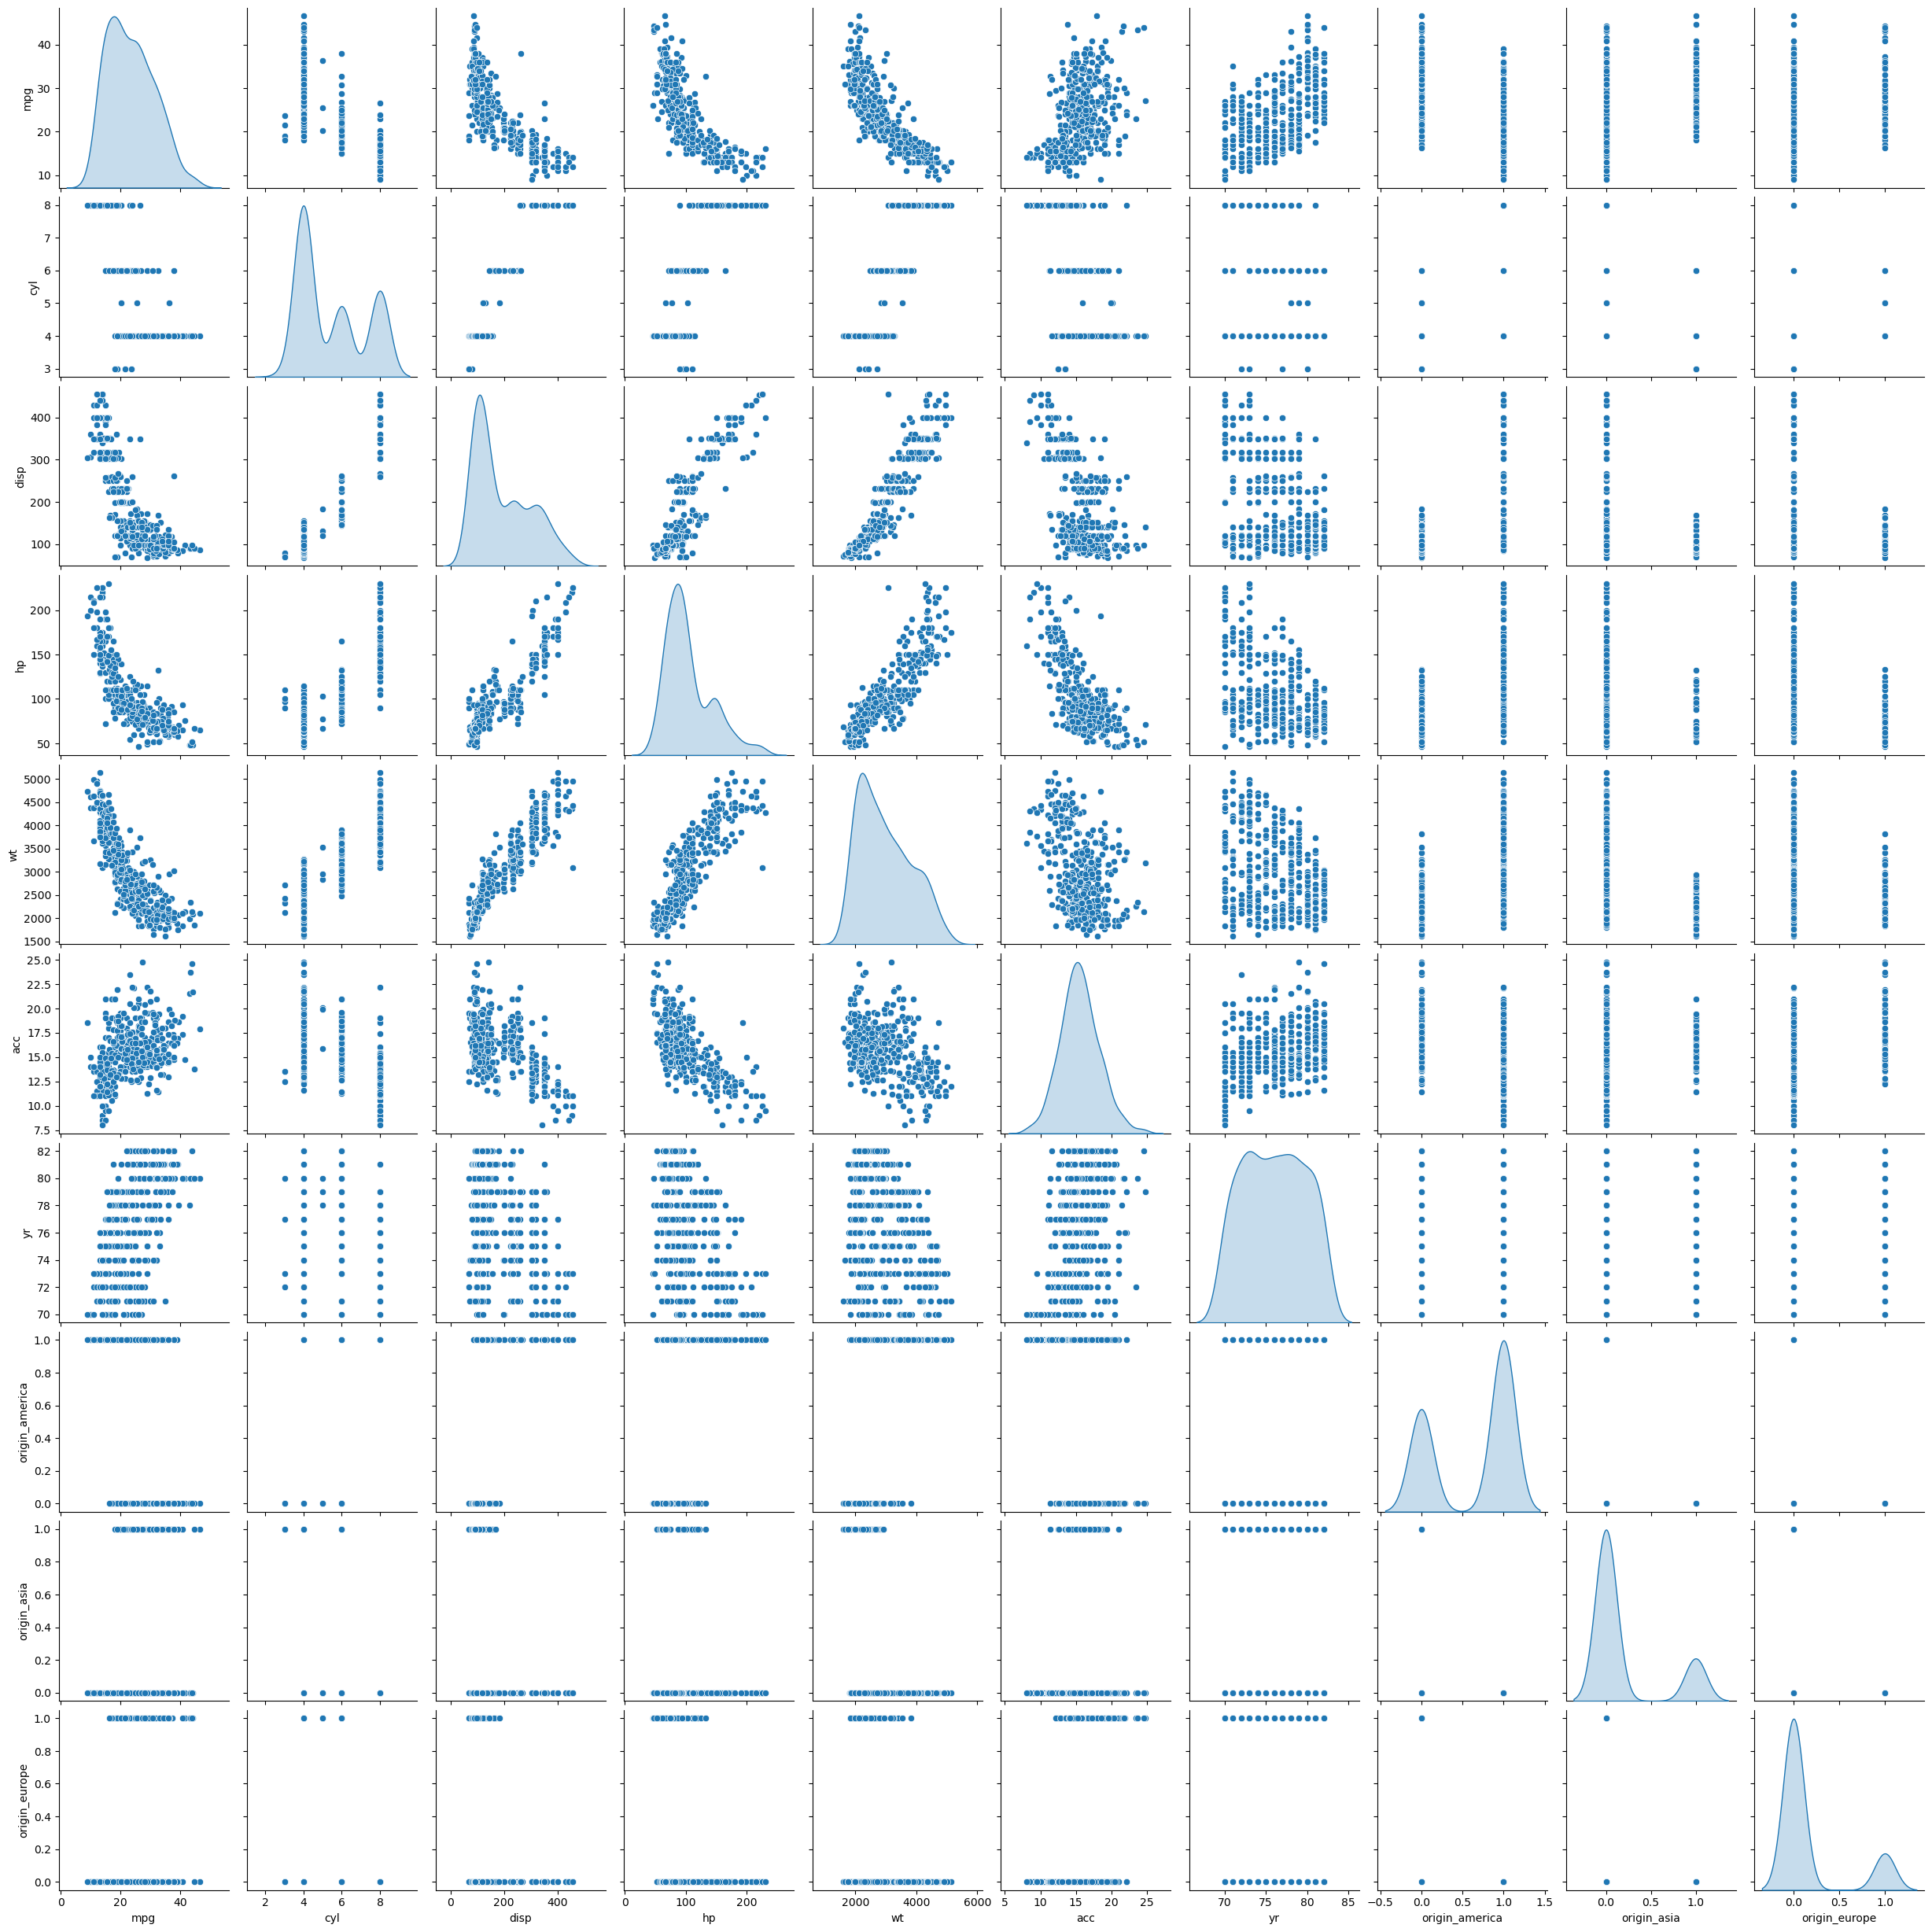

In [31]:
#sns.pairplot(car_df,diag_kind="kde")

Observation between 'mpg' and other attributes indicate the relationship is not really linear. However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern. Several assumptions of classical linear regression seem to be violated, including the assumption of no Heteroscedasticity


## Split Data

In [32]:
# lets build our linear model
# independant variables
X = car_df.drop(['mpg'], axis=1)
# the dependent variable
y = car_df[['mpg']]

In [33]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)

## Fit Linear Model

In [34]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)


LinearRegression()

Here are the coefficients for each variable and the intercept

The score (R^2) for in-sample and out of sample

In [35]:
model_1.score(X_train, y_train)

0.8215521225570097

In [36]:
#out of sample score (R^2)

model_1.score(X_test, y_test)


0.8226939742691542

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

#y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.9044323619674877


In [38]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))

0.8638436398288795
